In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class TrainingArgs:
    def __init__(self):
        pass

In [3]:
vgg_adam = torch.load('/content/drive/MyDrive/Final-Project/model-checkpoints/vgg16-adam-mnist.pt', map_location=torch.device('cpu'))
vgg_sgd = torch.load('/content/drive/MyDrive/Final-Project/model-checkpoints/vgg16-sgd-mnist.pt', map_location=torch.device('cpu'))
vgg_nesterov = torch.load('/content/drive/MyDrive/Final-Project/model-checkpoints/vgg16-sgd-nesterov-mnist.pt', map_location=torch.device('cpu'))

adam_his = vgg_adam['history']
sgd_his = vgg_sgd['history']
nesterov_his = vgg_nesterov['history']

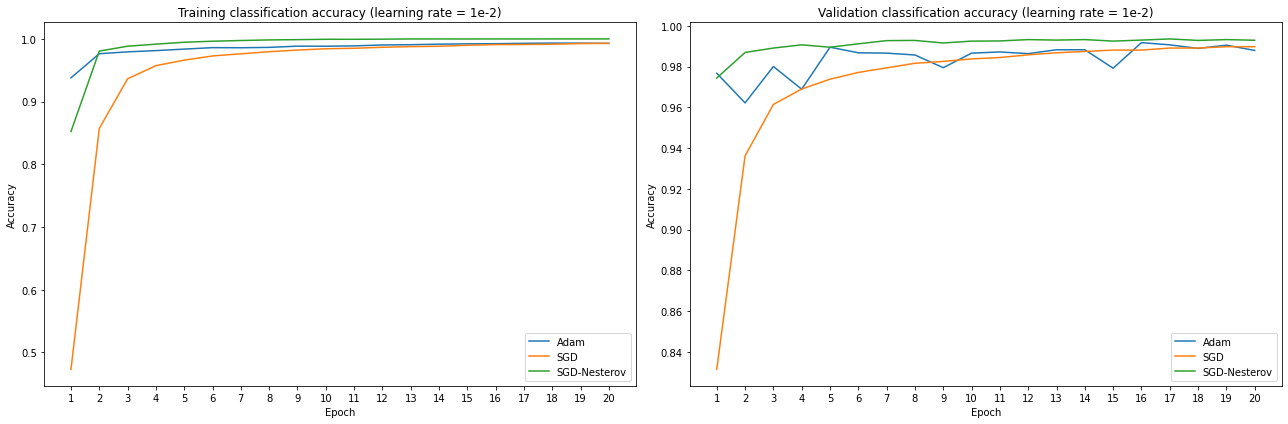

In [4]:
fig, axs = plt.subplots(1,2,figsize=(18,6))

history = [adam_his, sgd_his, nesterov_his]
labels = ['Adam', 'SGD', 'SGD-Nesterov']
for his, label in zip(history, labels):
    axs[0].plot(np.arange(1, len(his['acc']['train']) + 1, 1), his['acc']['train'], label = label)
    axs[0].set(
        title = 'Training classification accuracy (learning rate = 1e-2)',
        xlabel = 'Epoch',
        ylabel = 'Accuracy'
    )
    axs[1].plot(np.arange(1, len(his['acc']['val']) + 1, 1), his['acc']['val'], label = label)
    axs[1].set(
        title = 'Validation classification accuracy (learning rate = 1e-2)',
        xlabel = 'Epoch',
        ylabel = 'Accuracy'
    )

axs[0].legend()
axs[1].legend()
axs[0].set(xticks = np.arange(1, 21, step = 1))
axs[1].set(xticks = np.arange(1, 21, step = 1))

fig.savefig('vgg16_classification.jpg')

plt.tight_layout()
plt.show()